# Week 9: Descriptive Statistics – Instructor-led Lab  
Michelle Calderwood | BGEN 632 – Spring 2025

## Part 1: Set Up & Data Prep

### Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Read in Data

In [74]:
hosp = pd.read_csv('data/CaliforniaHospitalData.csv')
pers = pd.read_csv('data/CaliforniaHospitalData_Personnel.txt', delimiter='\t')

Hospital data and personnel data successfully loaded using appropriate delimiters and file paths.

### Merge Data

In [126]:
df = pd.merge(pers, hosp, on='HospitalID')

Merged hospital and personnel data using HospitalID as the common key.

### Drop Unnecessary Columns

In [128]:
df.columns = df.columns.str.strip()  # clean up whitespace
df.drop(columns=['Work_ID', 'PositionID', 'Website'], inplace=True, errors='ignore')

### Add Myself

In [130]:
from datetime import datetime

new_row = {
    'HospitalID': df['HospitalID'].iloc[0],
    'LastName': 'Calderwood',
    'FirstName': 'Michelle',
    'Gender': 'F',
    'PositionTitle': 'Acting Director',
    'Compensation': 248904,
    'MaxTerm': 8,
    'StartDate': pd.to_datetime(datetime.today().date()),
    # Add required hospital fields from existing row
    'Name': df['Name'].iloc[0],
    'Zip': df['Zip'].iloc[0],
    'TypeControl': df['TypeControl'].iloc[0],
    'Teaching': df['Teaching'].iloc[0],
    'DonorType': df['DonorType'].iloc[0],
    'NoFTE': df['NoFTE'].iloc[0],
    'NetPatRev': df['NetPatRev'].iloc[0],
    'InOperExp': df['InOperExp'].iloc[0],
    'OutOperExp': df['OutOperExp'].iloc[0],
    'OperRev': df['OperRev'].iloc[0],
    'OperInc': df['OperInc'].iloc[0],
    'AvlBeds': df['AvlBeds'].iloc[0]
}

df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

### Convert Data Types

In [132]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
cat_cols = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
df[cat_cols] = df[cat_cols].astype('category')

## Part 2: Descriptive Statistics

### Numeric Summary 

In [134]:
df.describe()

,HospitalID,Compensation,MaxTerm,StartDate,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,62.000000,62.000000,62.000000,62,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000
mean,31510.983871,95292.935484,4.306452,2010-04-30 11:36:46.451612928,1334.050323,6.609799e+05,1.641283e+08,8.903212e+07,2.530004e+08,-1.600110e+05,192.983871
min,10767.000000,23987.000000,2.000000,2002-01-01 00:00:00,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,20471.000000,46978.000000,3.000000,2009-04-02 06:00:00,216.375000,7.284830e+04,1.382645e+07,1.429398e+07,2.685966e+07,-1.028922e+06,42.750000
50%,33246.500000,46978.000000,4.000000,2011-01-01 00:00:00,368.660000,1.670720e+05,3.227595e+07,3.259692e+07,6.153388e+07,1.464124e+06,99.000000
75%,39095.500000,89473.000000,4.000000,2012-01-01 00:00:00,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000
max,46996.000000,248904.000000,8.000000,2025-04-25 00:00:00,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000
std,11205.697065,86160.789603,2.146967,NaN,2012.669341,1.090586e+06,2.809669e+08,1.364481e+08,4.222744e+08,7.095573e+07,220.341352


Numeric summary shows wide range in operating expenses and available beds. Notably, OperInc includes negative values, possibly indicating financial loss.

### Text Variables

In [136]:
df[['FirstName', 'LastName', 'PositionTitle']].describe(include='all')

,FirstName,LastName,PositionTitle
count,62,62,62
unique,20,24,4
top,David,Smith,Regional Representative
freq,6,4,24


PositionTitle has 4 unique roles; top entry is Regional Representative. Some individuals share names, but role distribution appears correct.

### Categorical Variables

In [138]:
df[cat_cols].describe()

,TypeControl,Teaching,DonorType,Gender
count,62,62,62,62
unique,4,2,2,2
top,Non Profit,Small/Rural,Charity,F
freq,38,45,45,33


Categorical data is correctly cast. Most hospitals are Non-Profit and Small/Rural, with balanced gender representation.

## Part 3: Visualizations

### Histograms

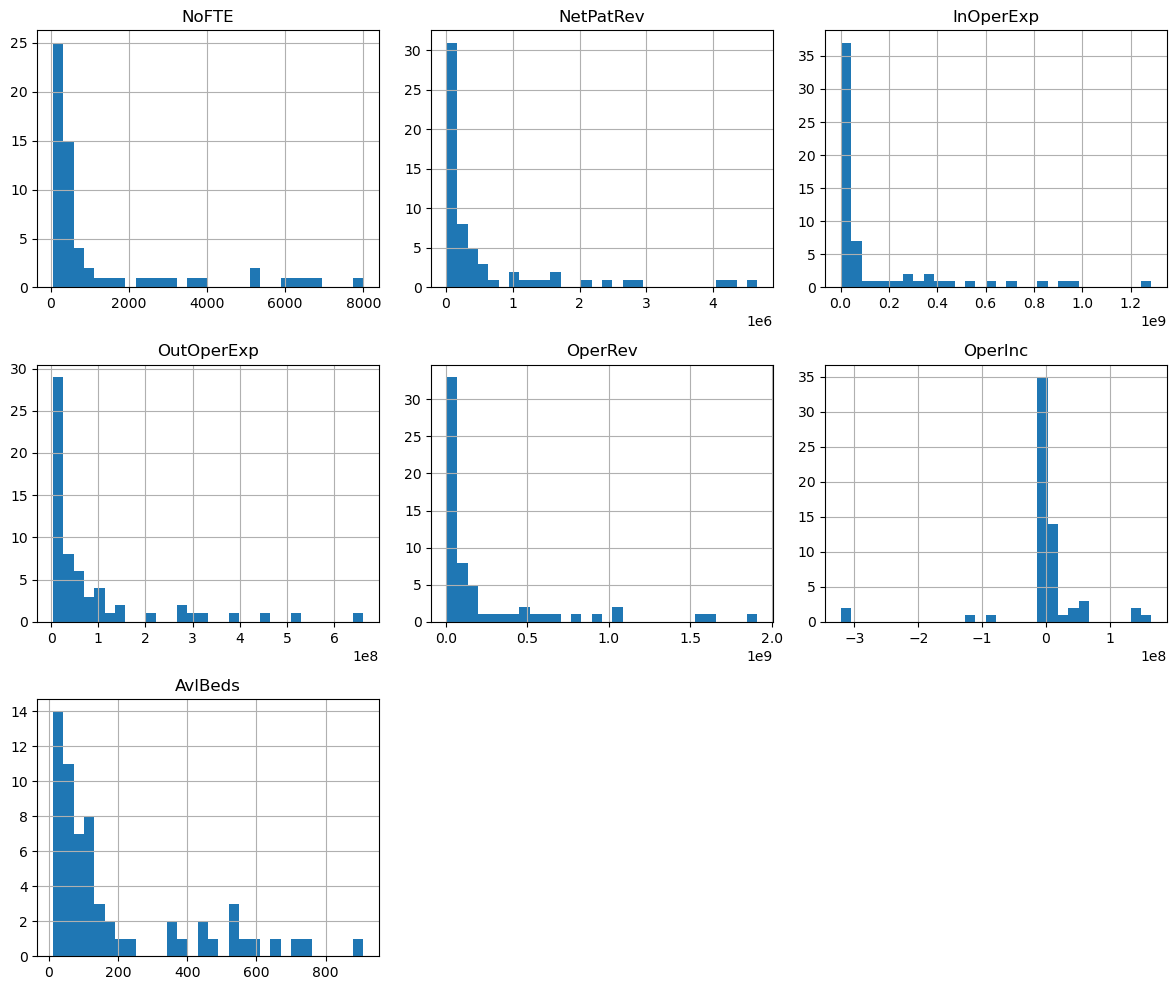

In [140]:
num_vars = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
df[num_vars].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

Most variables are right-skewed with outliers. OperRev and InOperExp show particularly large ranges.

### Scatterplots

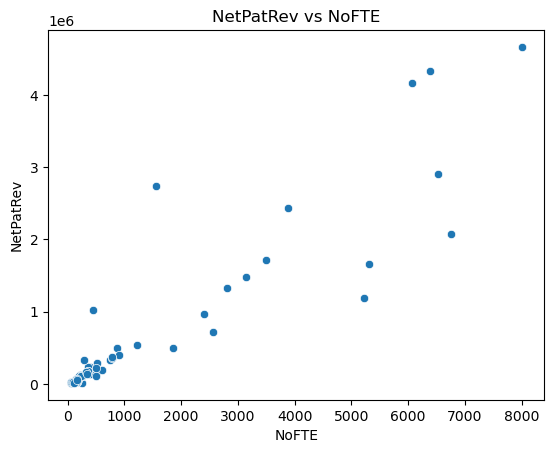

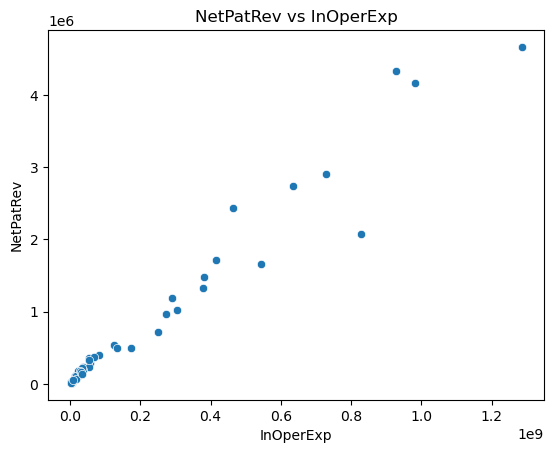

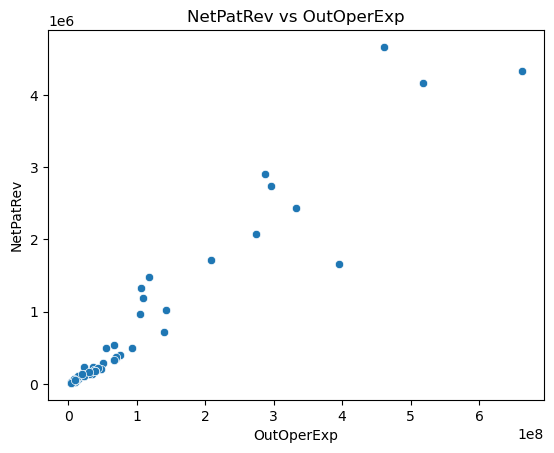

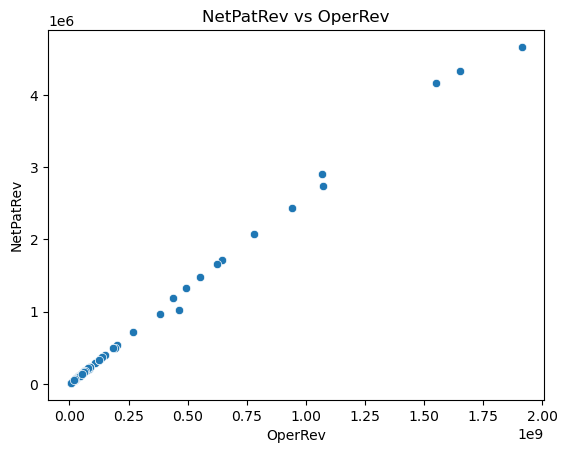

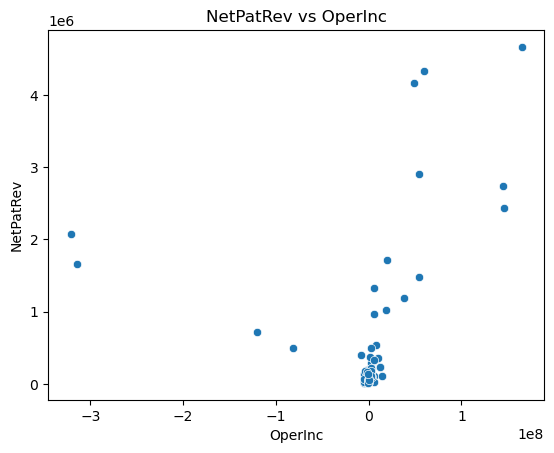

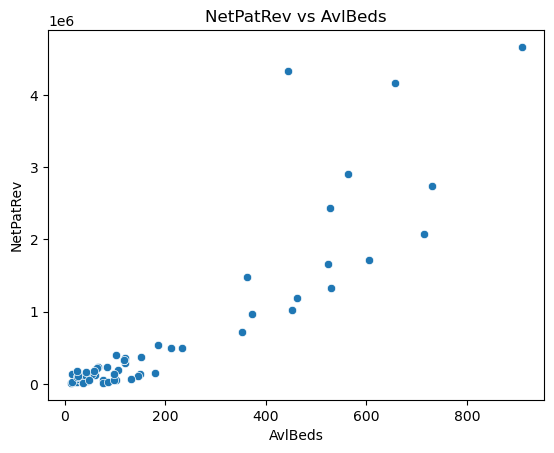

In [142]:
for var in num_vars:
    if var != 'NetPatRev':
        sns.scatterplot(x=var, y='NetPatRev', data=df)
        plt.title(f'NetPatRev vs {var}')
        plt.show()

Net patient revenue shows strong positive linear relationships with OperRev, OutOperExp, and InOperExp. OperInc shows a more dispersed pattern with possible outliers.

### Boxplots

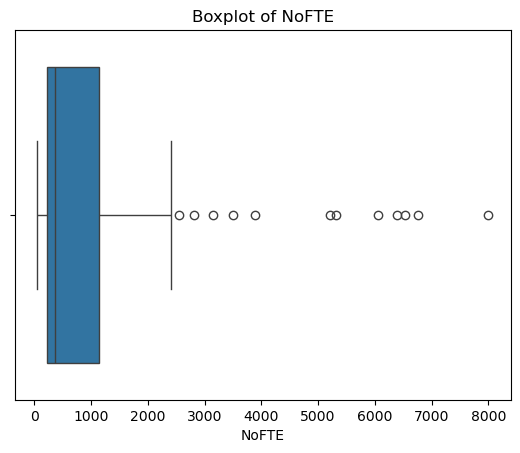

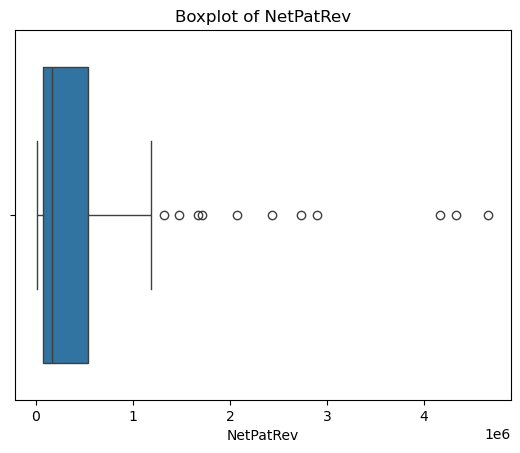

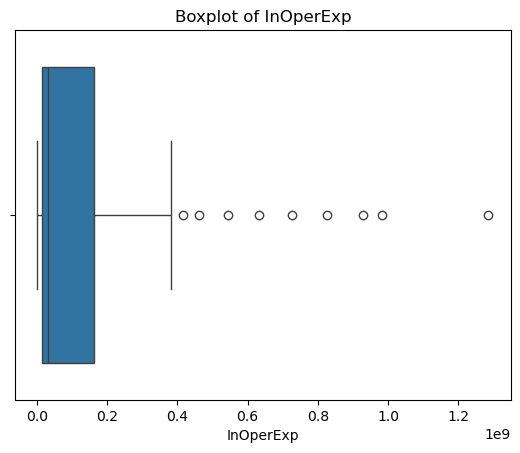

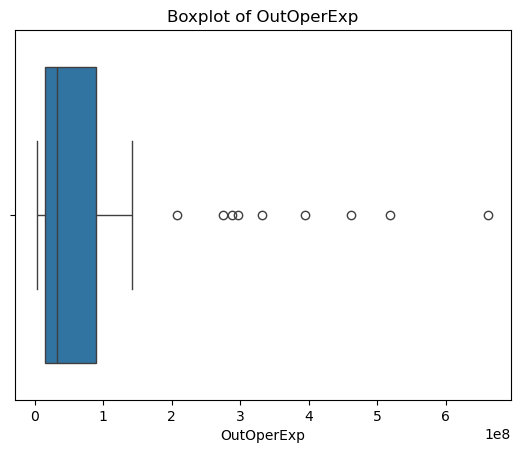

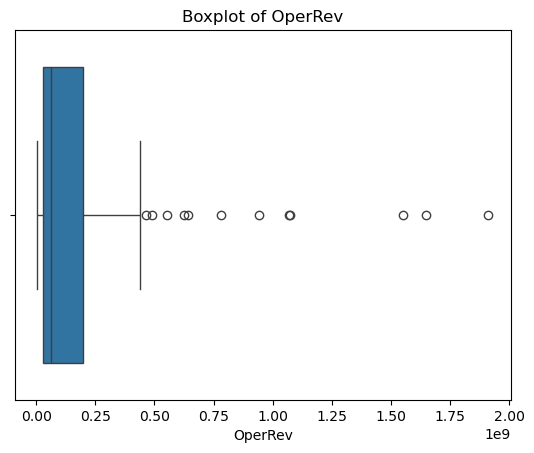

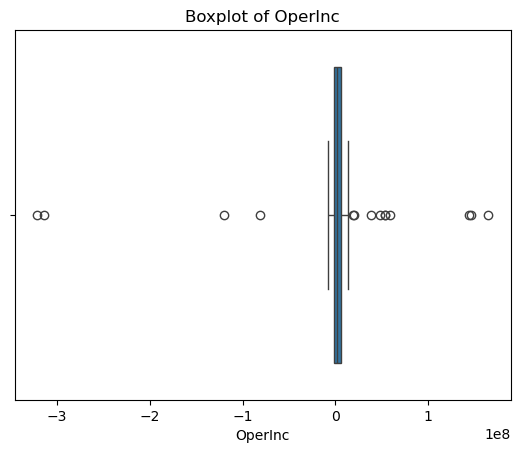

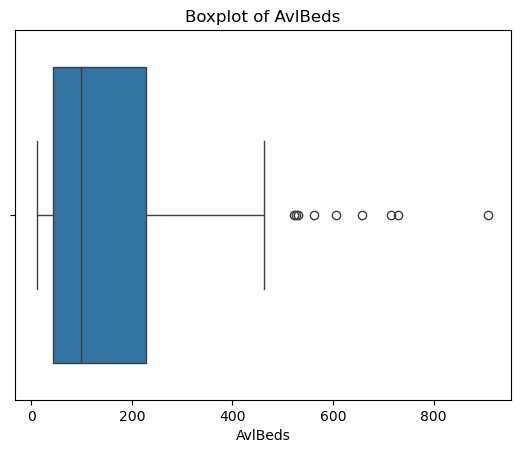

In [144]:
for var in num_vars:
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

Most variables, including NoFTE, NetPatRev, and OperRev, show heavy right-skew with many high-value outliers. These represent hospitals with much larger budgets or size. OperInc even contains some negative outliers, suggesting financial losses. Outliers are expected in hospital operations data due to large scale differences in institutions.

## Part 4: Normality Assessments

### QQ Plots

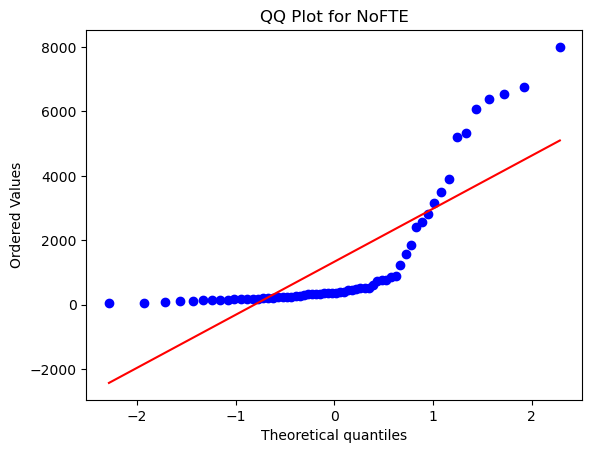

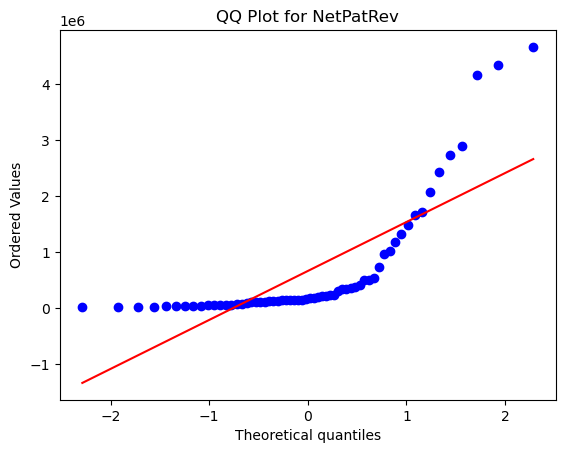

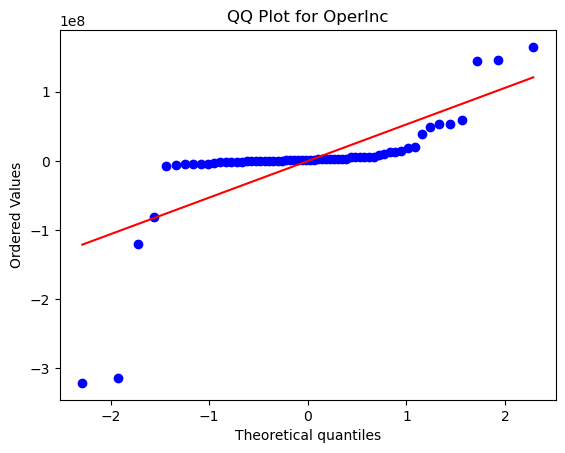

In [146]:
for var in ['NoFTE', 'NetPatRev', 'OperInc']:
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot for {var}')
    plt.show()

All three QQ plots show significant deviation from the straight line, especially in the upper tails. This suggests non-normality for NoFTE, NetPatRev, and OperInc. These variables have long right tails due to high-budget hospitals, which pulls the distribution out of normal shape.

### Shapiro Wilks Test 

In [148]:
for var in ['NoFTE', 'NetPatRev', 'OperInc']:
    stat, p = stats.shapiro(df[var].dropna())
    print(f'{var}: Statistics={stat:.3f}, p={p:.3f}')

NoFTE: Statistics=0.640, p=0.000
NetPatRev: Statistics=0.619, p=0.000
OperInc: Statistics=0.556, p=0.000


All variables tested—NoFTE, NetPatRev, and OperInc—returned p-values < 0.001, indicating strong evidence against the null hypothesis of normality. This confirms what we observed in the QQ plots: these variables do not follow a normal distribution and may require transformation (e.g., log) before modeling.

### References

[ChatGPT_Instructor_Lab.ipynb](ChatGPT_Instructor_Lab.ipynb)